## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Importing Datasets

In [2]:
train_df = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
test_df = pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")

In [3]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
# concatenating both train and test datasets
df = pd.concat([train_df, test_df], axis = 0)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
# dropping Unnamed column
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

# checking info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int64(5),

In [8]:
# checking null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
#checking duplicated
df.duplicated().sum()

0

In [10]:
# statistical data
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


<Axes: xlabel='is_fraud', ylabel='count'>

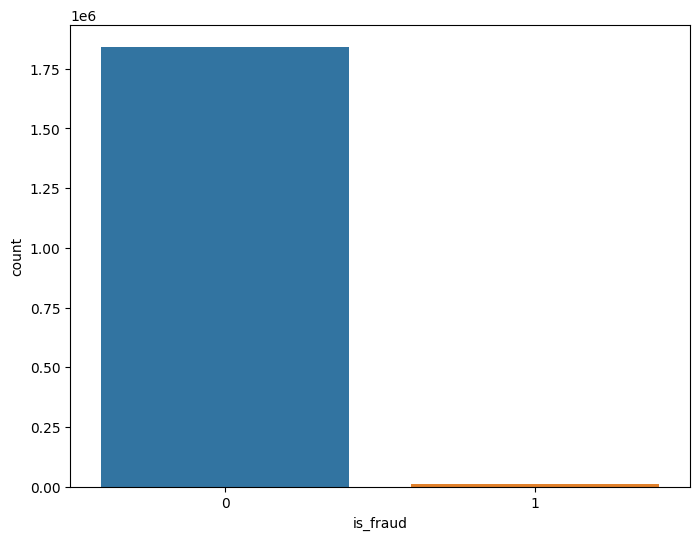

In [11]:
# Visualizing Fraud and Non-Fraud Count
plt.figure(figsize = (8,6))
sns.countplot(x = df['is_fraud'])

<Axes: xlabel='gender', ylabel='count'>

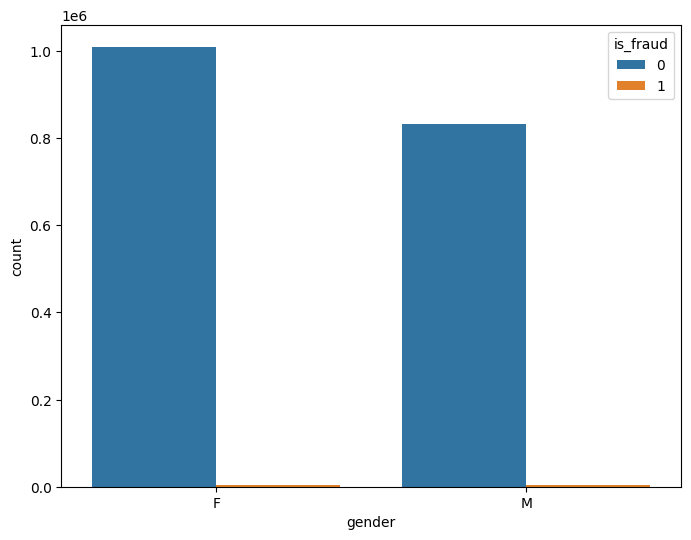

In [12]:
# Visualizing Fraud and Non-Fraud w.r.t Gender
plt.figure(figsize = (8,6))
sns.countplot(x = 'gender', hue = 'is_fraud', data = df)

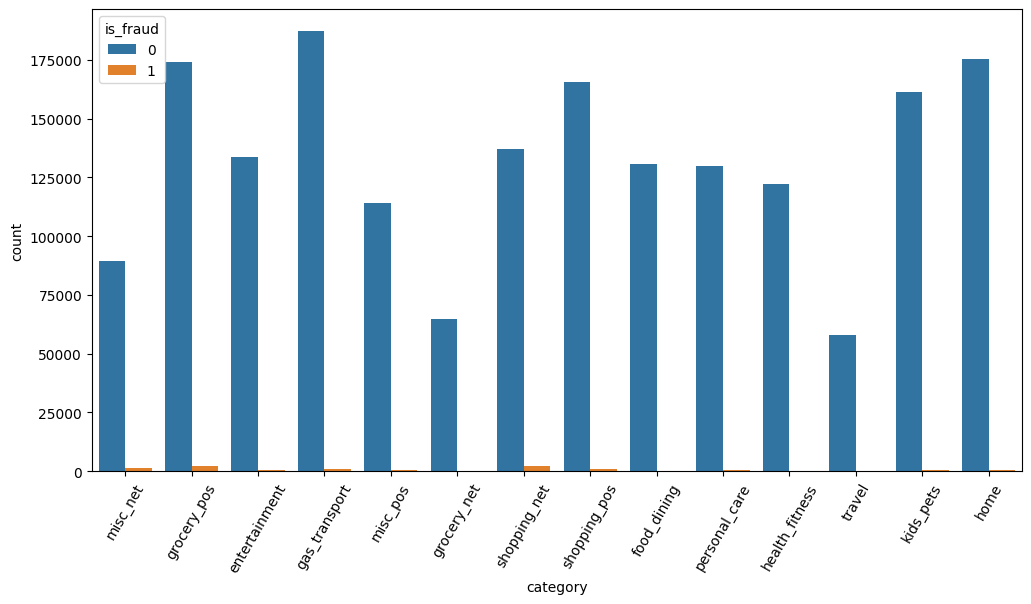

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'category', hue = 'is_fraud', data = df)
plt.xticks(rotation=60)
plt.show()

In [14]:
# creating separate datasets for dependent and independent features
X = df.drop(['is_fraud'], axis = 1)
y = df['is_fraud']

## Encoding categorical features and Scaling the dataset

In [15]:
from sklearn.preprocessing import OrdinalEncoder
categorical_cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

In [16]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
X.shape

(1852394, 21)

In [18]:
y = df[['is_fraud']].values

In [19]:
y.shape

(1852394, 1)

In [20]:
df['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

## Resampling highly imbalanced dataset with oversampling

- Preserves Information: With few fraud cases, undersampling alone would eliminate too much data, risking underfitting.
- Model Stability: Adding synthetic samples allows the model to learn fraud patterns while retaining enough majority class samples to avoid overfitting.

In [21]:
# from imblearn.combine import SMOTEENN
# from collections import Counter

# # SMOTEENN combines SMOTE (oversampling) and Edited Nearest Neighbors (undersampling)
# X_resampled, y_resampled = SMOTEENN().fit_resample(X, y)
# print("Resampled dataset distribution:", Counter(y_resampled))

In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print("Resampled dataset distribution:", Counter(y_resampled))

print('Data   : ', X_resampled.shape)
print('Labels : ', y_resampled.shape)

Resampled dataset distribution: Counter({0: 1842743, 1: 1842743})
Data   :  (3685486, 21)
Labels :  (3685486,)


## Splitting resampled in to training and testing datasets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 45)

In [24]:
print('Training Data Shape   : ', X_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', X_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (2948388, 21)
Training Labels Shape :  (2948388,)
Testing Data Shape    :  (737098, 21)
Testing Labels Shape  :  (737098,)


## Buiding Model using Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [26]:
# prediction on testing dataset
y_pred_lr = log_reg.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_lr)

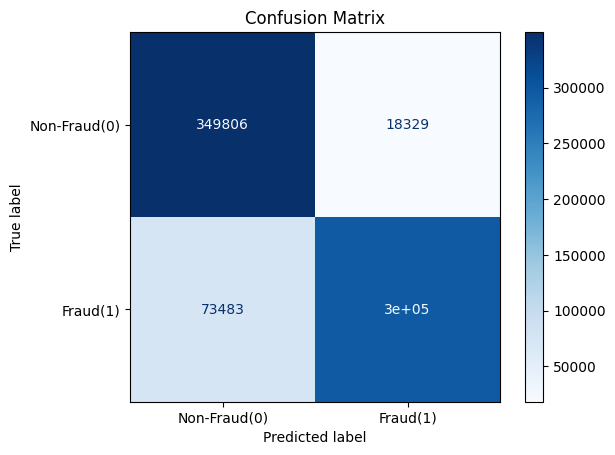

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud(0)', 'Fraud(1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred_lr)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred_lr)
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred_lr)
print(f"F1 Score: {f1:.2f}")

# Classification Report (includes all above metrics)
report = classification_report(y_test, y_pred_lr, target_names=['Non-Fraud(0)', 'Fraud(1)'])
print("\nClassification Report:\n", report)


Accuracy: 0.88
Precision: 0.94
Recall: 0.80
F1 Score: 0.87

Classification Report:
               precision    recall  f1-score   support

Non-Fraud(0)       0.83      0.95      0.88    368135
    Fraud(1)       0.94      0.80      0.87    368963

    accuracy                           0.88    737098
   macro avg       0.88      0.88      0.87    737098
weighted avg       0.88      0.88      0.87    737098



## Model Building using Decision Trees

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 50, random_state = 100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [31]:
# prediction on testing dataset
y_pred_dt = dt.predict(X_test)

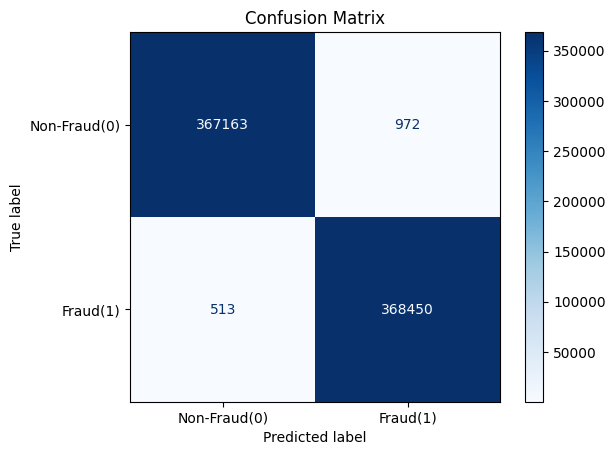

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud(0)', 'Fraud(1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred_dt)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred_dt)
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred_dt)
print(f"F1 Score: {f1:.2f}")

# Classification Report (includes all above metrics)
report = classification_report(y_test, y_pred_dt, target_names=['Non-Fraud(0)', 'Fraud(1)'])
print("\nClassification Report:\n", report)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

Non-Fraud(0)       1.00      1.00      1.00    368135
    Fraud(1)       1.00      1.00      1.00    368963

    accuracy                           1.00    737098
   macro avg       1.00      1.00      1.00    737098
weighted avg       1.00      1.00      1.00    737098



## Building Model using Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, max_depth = 15, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [35]:
# prediction on test data
y_pred_rf = rf.predict(X_test)

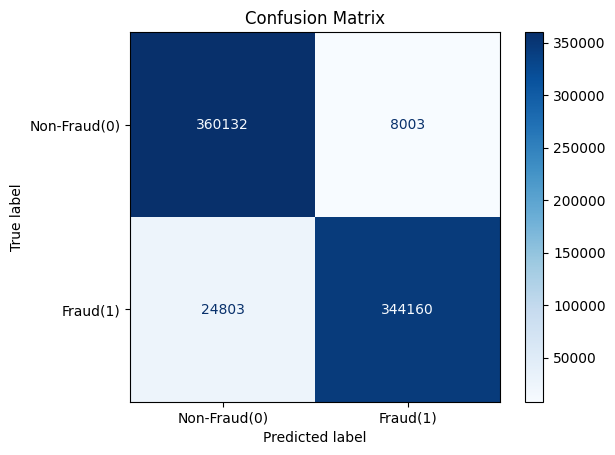

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud(0)', 'Fraud(1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred_rf)
print(f"F1 Score: {f1:.2f}")

# Classification Report (includes all above metrics)
report = classification_report(y_test, y_pred_dt, target_names=['Non-Fraud(0)', 'Fraud(1)'])
print("\nClassification Report:\n", report)

Accuracy: 0.96
Precision: 0.98
Recall: 0.93
F1 Score: 0.95

Classification Report:
               precision    recall  f1-score   support

Non-Fraud(0)       1.00      1.00      1.00    368135
    Fraud(1)       1.00      1.00      1.00    368963

    accuracy                           1.00    737098
   macro avg       1.00      1.00      1.00    737098
weighted avg       1.00      1.00      1.00    737098

